# Arbeitsblatt 1: Explorative Analyse und Hauptkomponentenanalyse



[TOC](#Inhaltsverzeichnis)


## 1. Explorative Analyse des Datensatzes ''Boston Housing''

*Boston Housing* ist ein berühmter Datensatz zur Evaluierung von Regressionsalgorithmen. Er enthält 506 Einträge mit jeweils 13 Variablen. Ziel ist es, den Hauspreis (`tgt`) aus den anderen Variablen vorherzusagen. Der Download dieses Datensatzes in einen Pandas-DataFrame wird folgendermaßen durchgeführt:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"numpy version: {np.__version__}, pandas version: {pd.__version__}")

In [ ]:
url     = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols    = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT','TGT']
boston  = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, index_col=False)

Wichtig für diese Übung ist eine grundlegende Vertrautheit mit den Python-Paketen Numpy und Pandas. Die Abgabe der Aufgabe erfolgt als fertiges IPython-Notebook mit Kommentaren in Markdown.

Aufgaben:

---
### 1.1 Explorative Analyse

a) Führen Sie für diesen Datensatz eine explorative Analyse wie in der Vorlesung gezeigt mithilfe eines IPython-Notebooks und den Paketen Pandas und Numpy durch. 

#### 1.1.1 Darstellung als Pandas-DataFrame

Im ersten Schritt wird sich der Datensatz bzw. die ersten 5 Einträge wie im [Vorlesungsbeispiel](../../lecture/01_eda/explorative_analyse.ipynb) gezeigt als Pandas-DataFrame ausgegeben.

In [ ]:
boston.head()

Zeilenbezeichnungen:
- `CRIM` = Kriminalitätsrate
- `ZN` = Anteil Wohngebiete
- `INDUS` = Anteil Nicht-Einzelhandels-Geschäfte
- `CHAS` = Charles River Dummy-Variable
- `NOX` = Stickstoffdioxidkonzentration
- `RM` = Durchschnittliche Anzahl Räume
- `AGE` = Anteil der Eigenheime
- `DIS` = Gewichtete Entfernungen zu Beschäftigungszentren
- `RAD` = Index der Annehmlichkeiten
- `TAX` = Grundsteuer
- `PTRATIO` = Schüler-Lehrer-Verhältnis
- `B` = Anteil der Schwarzen Bevölkerung
- `LSTAT` = Anteil der einkommensschwachen Bevölkerung
- `TGT` = Zielvariable (Hauspreis)

Erklärung zu den Zeilen siehe (https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

Anschließend lässt sich mittels `shape` die Dimension des DataFrames ausgeben sowie die Spaltennamen mit `columns` anzeigen und die Datentypen mit `dtypes` überprüfen.

In [ ]:
np.shape(boston)

In [ ]:
boston.columns

In [ ]:
boston.dtypes

#### 1.1.2 Aufbereitung des Datensatzes

Im nächsten Schritt wird überprüft, ob der Datensatz fehlende Werte enthält und wie viele Einträge es sind. Dies wird wie im [Vorlesungsbeispiel](../../lecture/01_eda/explorative_analyse.ipynb) mittels `isnull()` und `sum()` durchgeführt.

In [ ]:
boston.isna().any()

In dem Fall sind keine fehlenden Werte vorhanden und somit diesbezüglich keine weiteren Schritte zur Aufbereitung des Datensatzes notwendig.

Dennoch ist es weiterhin notwendig zu prüfen, ob es Duplikate im Datensatz gibt. Dies wird mit der Methode `duplicated()` überprüft. Auch hier sind keine Duplikate vorhanden.

In [ ]:
boston.duplicated().any()

#### 1.1.3 Explorative Statistiken

Im nächsten Schritt werden einige grundlegende Statistiken des Datensatzes ausgegeben, wie z.B. Mittelwert, Median, Standardabweichung, Minimum und Maximum. Dies kann mit der Methode `describe()` von Pandas durchgeführt werden.

In [ ]:
boston.describe()

Anschließen soll eine Streumatrix erstellt werden welche im Aufgabenteil b) weiterverwendet wird.

In [ ]:
pd.plotting.scatter_matrix(boston, figsize=(14, 14), diagonal='kde');

---
### 1.2 Analyse der Streumatrix

b) Beantworten Sie anhand der Darstellung der Streumatrix folgende Fragen: Welche der Variablen sind kategorisch? Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum? Welche dieser Variablen sind miteinander korreliert? Welche sind daher Kandidaten, die man evtl. weglassen könnte? (Beantwortung bitte als Markup in Notebook eintragen)

#### 1.2.1 Kategorische Variablen identifizieren

Um zu prüfen welche Variablen im Datensatz kategorisch sind, also diskret und mit wenigen verschiedenen Ausprägungen, können die Datentypen und die Anzahl der eindeutigen Werte jeder Spalte untersucht werden.

In [ ]:
boston.dtypes
boston.nunique().sort_values()

Hieraus gehen folgende Variablen als kategorisch hervor:
- `CHAS`: Diese Variable ist eine Dummy-Variable (0 oder 1)
- `RAD`: Diese Variable hat eine begrenzte Anzahl von eindeutigen Werten und repräsentiert verschiedene Indizes der Annehmlichkeiten.=

#### 1.2.2 Vorhersage des Hauspreises anhand der Streumatrix

Die Streumatrix zeigt die paarweisen Beziehungen zwischen den Variablen im Datensatz. Um zu beurteilen, welche Variablen gut zur Vorhersage des Hauspreises (`TGT`) geeignet sind, sollte man nach Variablen suchen, die eine starke Korrelation mit `TGT` aufweisen. In der Streumatrix sind solche Beziehungen durch eine klare lineare oder nicht-lineare Verteilung der Punkte erkennbar.

Hierbei ist es wahrscheinlich hilfreich sich den Trend der Punktewolke anzusehen und zu beurteilen ob ein linearer oder nicht-linearer Zusammenhang besteht. Hierzu wurden ein einzelner Scatterplot für jedes Feature gegen die Zielvariable `TGT` erstellt und eine Regressionslinie hinzugefügt um den Trend besser erkennen zu können (die Abbildung am besten in einem separaten Fenster betrachten :)

In [ ]:
features = [c for c in boston.columns if c != 'TGT']
n = len(features)

# create subplots for each feature
fig, axs = plt.subplots(1, n, figsize=(8*n, 8), sharey=True, constrained_layout=True)

if n == 1:
    axs = [axs]
# plot scatter plots with regression lines for each feature against TGT
for ax, f in zip(axs, features):
    ax.scatter(boston[f], boston['TGT'], s=20, alpha=0.6)
    ax.set_xlabel(f)
    ax.set_ylabel('TGT')
    m, b = np.polyfit(boston[f], boston['TGT'], 1)
    ax.plot(boston[f], m*boston[f] + b, color='red', linewidth=1)
plt.show()

Aus der visuellen Analyse der Scatterplots lassen sich folgende Zusammenhänge erkennen:
- `RM` (durchschnittliche Anzahl Räume): Zeigt eine starke positive Korrelation mit `TGT`. Mehr Räume führen tendenziell zu höheren Hauspreisen.
- `LSTAT` (Anteil der einkommensschwachen Bevölkerung): Zeigt eine starke negative Korrelation mit `TGT`. Ein höherer Anteil einkommensschwacher Bevölkerung ist mit niedrigeren Hauspreisen verbunden.
- `NOX` (Stickstoffdioxidkonzentration): Zeigt eine moderate negative Korrelation mit `TGT`. Höhere NOX-Werte sind mit niedrigeren Hauspreisen verbunden (was so viel heißt wie umso schlechter die Luftqualität ist umso niedriger die Hauspreise).

**Fazit:** Die Variablen `RM`, `LSTAT` und `NOX` eignen sich gut zur Vorhersage des Hauspreises aufgrund ihrer starken Korrelation mit der Zielvariable `TGT`. Bei den anderen Variablen (von den kategorischen abgesehen) lassen sich zwar auch teilweise zusammenhänge erkennen, diese sind jedoch weniger stark ausgeprägt.

#### 1.2.3 Korrelation zwischen Variablen

Um zu überprüfen, welche Variablen miteinander korreliert sind, kann die Korrelationsmatrix des Datensatzes berechnet werden. Variablen mit hoher Korrelation (z.B. > 0.8 oder < -0.8) könnten Kandidaten sein, die man evtl. weglassen könnte, um Redundanz zu vermeiden.

Um dies visuell besser darzustellen eignet sich die Heatmap einer Korrelationsmatrix welche mittels des Pakets Seaborn erstellt werden kann.


In [ ]:
# calculate correlation matrix
corr = boston.corr()

# plot heatmap of correlation matrix using seaborn
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelations-Heatmap')
plt.show()


Die Heatmap bestätigt die zuvor identifizierten Korrelationen zwischen den Variablen und der Zielvariable `TGT`. Zusätzlich zeigt sie auch Korrelationen zwischen den unabhängigen Variablen selbst auf.

Da das dank KI alles so "leicht von der Hand geht" wurde mal noch wie im [Vorlesungsbeispiel](../../lecture/00_intro/cor_dataland.ipynb) gezeigt der Korrelationskoeffizient nach Pearson für die Variable mit der höchsten Korrelation (`RM`) mit der Zielvariable `TGT` berechnet. Der ermittelte Wert stimmt dabei mit dem aus der Korrelationsmatrix überein.

In [ ]:
from scipy.stats import pearsonr

corr, p = pearsonr(boston['RM'], boston['TGT'])
print(f"Korrelationskoeffizient nach Pearson (scipy) RM/TGT: = {corr:.4f}")

#### 1.2.4 Unnötige Variablen

Die gezeigten Analysen zeigen, dass einige Variablen wie z.B. `RAD` und `TAX` eine hohe Korrelation aufweisen (eine bessere Verkehrsanbindung führt oft zu höheren Grundsteuern), diese aber im Bezug auf die Zielvariable `TGT` nur eine moderate Korrelation zeigen. Jedoch stellen sich auch im Bezug auf die Zielvariable `TGT` einige Variablen wie z.B. `ZN`, `DIS` oder `B` (#BlackLiveMatters) als eher irrelevant heraus. Das zeigt sehr gut das eine explorative Analyse wichtig ist um die richtigen Features für den eigentlichen Use-Case auszuwählen.
___

### 1.3 Dokumentation der Systemkonfiguration

c) Die Dokumentation der eingesetzten Systemkonfiguration und Paketversionen erfolgt durch das Skript `version_information` von R. H. Johanson. Installation über

In [ ]:
pip install version-information

Im Notebook-Header muss das Paket importiert werden über

In [ ]:
%load_ext version_information

Danach kann die Information über die Systemkonfiguration dargestellt werden durch

In [ ]:
%version_information

Sollen zusätzlich Versionsinformationen über die eingesetzten Pakete dargestellt werden, verwendet man (hier z.B. Numpy und Pandas)

In [ ]:
%version_information numpy, pandas

Diese Zeilen sollten immer am Ende des Notebooks aufgerufen werden, um ein Mindestmaß an Reproduzierbarkeit sicherzustellen.

___
___

## 2. Datenvorverarbeitung mit Pandas: Food Nutrient Database

Diese Aufgabe befasst sich mit einer deutlich umfangreicheren Datenbank des *U.S. Department of Agriculture*, aufbereitet im Format JSON von A. Williams, zum Thema Nährstoffgehalt von Nahrungsmitteln. Sie enthält 6636 Einträge für Nahrungsmittel, alle in Form von JSON-Records, wie z.B.:

```
{
    "id": 21441,
    "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing,
        meat and skin with breading", "tags": ["KFC"],
    "manufacturer": "Kentucky Fried Chicken", "group": "Fast Foods",
    "portions": [ 
        {
            "amount": 1,
            "unit": "wing , with skin",
            "grams": 68.0 
        },
        ...
    ], 
    "nutrients": [
        {
            "value": 20.8,
            "units": "g", 
            "description": "Protein",
            "group": "Composition" 
        },
        ... 
    ]
}
```

Ziel der Analyse in dieser Übung ist es, eine explorative Analyse des Gehalts des Spurenelementes Zink in den verschiedenen Nahrungsmitteln durchzuführen. Notwendig dafür sind etwas aufwändigere, aber für die Datenanlyse typische Manipulationen mit Pandas sowie der
Einsatz zusätzlicher Python-Standardbibliotheken zum Download und der Verarbeitung von Zip- und JSON-Dateien.

Aufgaben:


### 2.1 Laden und Einlesen der Datenbank

a) Laden Sie die Datenbank als zip-File aus Moodle herunter und lesen Sie dieses File direkt in ein neues Notebook ein. Die bisher verwendete Pandas-Methode `read_csv()` funktioniert für JSON-Files leider nicht. Das heruntergeladene File wird stattdessen mithilfe des Pythonmoduls `zipfile` entpackt und dem Python-Befehl `open()` eingelesen. Die Umwandlung des JSON-Formates in ein geeignetes Python-Format erfolgt mit einem weiteren Modul der Python-Standardlibrary, `json`, hier mithilfe der Funktion `json.load()`. Lesen Sie dazu die zugehörigen, auf dem Web bzw. Stackoverflow verfügbaren Anleitungen.

#### 2.1.1 Einlesen und Entpacken des Zip-Files

Wie im Folgenden gezeigt, wird das Zip-File entpackt und die JSON-Daten eingelesen. Hierbei wurde sich nach einigem herumprobieren dafür entschieden, die in der JSON Datei vorhanden Dictionaries in einem übergeordneten Dictionary zu speichern, wobei die bereits vorhanden IDs der JSON Records als Keys verwendet werden.

In [ ]:
import zipfile
import json

# path to the zip file
zip_file_path = 'foods-2011-10-03.json.zip'

records = {}

with zipfile.ZipFile(zip_file_path, 'r') as z:
	file_list = [n for n in z.namelist() if not n.endswith('/')]  # nur Dateien, keine Verzeichnisse
	for file_name in file_list:
		with z.open(file_name) as f:
			data = json.load(f)
			if isinstance(data, list):
				for record in data:
					records[record['id']] = record

print(f"Anzahl der eingelesenen JSON-Records: {len(records)}")

prüfen ob das so geklappt hat wie gewünscht 

In [ ]:
print(f"type of records: {type(records)}")

Anzeigen aller in der Datenbank enthaltenen Keys

In [ ]:
records.keys()

Und dann mal noch schauen ob der aus der Aufgabenbeschreibung genannte Eintrag mit der ID 21441 auch wirklich Fried Chicken ist :)

In [ ]:
records.get(21441)

___

### 2.2 Aufbereitung der Datenbank

b) Die Datenbank steht nun in Form einer Liste aus 6636 Python-Dictionaries zu Verfügung. Jedes Dictionary enthält Angaben zu einem Nahrungsmittel. Greifen Sie sich ein beliebiges Nahrungsmittel heraus und lassen sich die Namen der Einträge mit der Methode `dict.keys()` anzeigen. Einer der Einträge enthält die enthaltenen Nährstoffe (`nutrients`), ebenfalls als Dictionary. Lassen Sie sich wiederum einen beliebigen Eintrag der Nährstoffliste anzeigen. Es sollte auffallen, dass manche Feldnamen doppelt vorkommen.

Teile dieser hierarchischen Struktur sollen nun in eine einheitliche Tabelle umgewandelt werden, um eine explorative Analyse durchführen zu können.

Vorgehensweise:

* Kopieren Sie zunächst die Felder `description`,`group`,`id`,`manufacturer` in einen eigenen DataFrame `info`, sowie alle Nährstofflisten in ein Array von DataFrames, wobei Sie an jeden DataFrame die entsprechende ID des Nahrungsmittels als eigene Spalte anhängen.
* Dieses Array wird mithilfe der Funktion `pandas.concat()` zu einem großen DataFrame nutrients (389355 Einträge) vereinigt.
* Entfernen Sie alle Duplikate aus diesem DataFrame.
* Bevor beide DataFrames vereinigt werden können, gibt es noch ein Problem: beide enthalten Felder mit dem Namen `description` und `group` (s.o.). Benennen Sie diese daher mithilfe von DataFrame.rename() in eindeutige Namen um.
* Vereinigen Sie beide DataFrames mit `pandas.merge(nutrients, info, on=’id’, how=’outer’)` anhand der Nahrungsmittel-ID.

Überprüfen Sie das Ergebnis jeder Manipulation mit `DataFrame.head()``.

#### 2.2.1 Anzeigen eines beliebigen Eintrags der Nährstoffliste

In [ ]:
records.get(11444).keys()

In [ ]:
import pprint

#record = records.get(11444)
record = records.get(21441)

pprint.pprint(record.get('nutrients'), width=120, sort_dicts=True)

#### 2.2.2 Umwandeln in DataFrames

##### DataFrames erstellen

Kopieren Sie zunächst die Felder `description`,`group`,`id`,`manufacturer` in einen eigenen DataFrame `info`...

In [ ]:
import pandas as pd

info = pd.DataFrame([
    {
        'id': r.get('id'),
        'description': r.get('description'),
        'group': r.get('group'),
        'manufacturer': r.get('manufacturer')
    }
    for r in records.values()
])

info.head()

... sowie alle Nährstofflisten in ein Array von DataFrames, wobei Sie an jeden DataFrame die entsprechende ID des Nahrungsmittels als eigene Spalte anhängen.

In [ ]:
nutrient_dfs = []
for r in records.values():
    nd = pd.DataFrame(r.get('nutrients', []))
    if not nd.empty:
        nd['id'] = r['id']
        nutrient_dfs.append(nd)
        
nutrient_dfs[0].head()

Dieses Array wird mithilfe der Funktion `pandas.concat()` zu einem großen DataFrame nutrients (389355 Einträge) vereinigt

In [ ]:
nutrients = pd.concat(nutrient_dfs, ignore_index=True)
print(nutrients.shape) # show the shape of the combined DataFrame (should be (389355, 5))

Entfernen Sie alle Duplikate aus diesem DataFrame.

In [ ]:
nutrients.drop_duplicates(inplace=True) # inplace=True to modify the DataFrame directly
print(nutrients.shape) # show the shape after removing duplicates

Bevor beide DataFrames vereinigt werden können, gibt es noch ein Problem: beide enthalten Felder mit dem Namen `description` und `group` (s.o.). Benennen Sie diese daher mithilfe von DataFrame.rename() in eindeutige Namen um. Dies soll nochmal anhand der beiden DataFrames `info` und `nutrients` gezeigt werden:

In [ ]:
nutrients.rename(columns={'description': 'nutrient_description', 'group': 'nutrient_group'}, inplace=True)
info.rename(columns={'description': 'food_description', 'group': 'food_group'}, inplace=True)
nutrients.head()

In [ ]:
info.head()

Vereinigen Sie beide DataFrames mit `pandas.merge(nutrients, info, on=’id’, how=’outer’)` anhand der Nahrungsmittel-ID.

In [ ]:
df = pd.merge(nutrients, info, on='id', how='outer') # how='outer' to keep all records
df.head()

In [ ]:
df.shape

___

### 2.3 Untersuchung des Spurenelements Zink

c) Nun sind die Daten bereit für die Untersuchung auf das Spurenelement Zink (Feldname: `Zinc, Zn`). Lesen Sie dazu alle Tabelleneinträge mithilfe einer geeigneten Indizierung in einen DataFrame aus, der nur Einträge zum Nährstoff Zink enthält...

#### 2.3.1 Auslesen der Zink-Einträge

In [ ]:
zn = pd.DataFrame(df[df['nutrient_description'] == 'Zinc, Zn'])
zn.head()

In [ ]:
zn.shape

Eine Untersuchung der Daten hat ergeben, dass Einträge zum Nährstoff Zink in `mg` vorliegen weshalb keine weitere Verarbeitung erforderlich ist.

#### 2.3.2 Explorative Statistiken des Zinkgehalts

... Daraus wählen Sie wiederum die Spalte mit dem Zinkgehalt in mg (`value`) aus und stellen dafür ein Histogramm und eine Liste deskriptiver Statistiken dar.

##### 2.3.2.1 Histogramm des Zinkgehalts in mg

In [ ]:
import matplotlib.pyplot as plt

# histogram of zinc content in mg
plt.figure(figsize=(10,6))
plt.hist(zn['value'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Zinc Content (mg)')
plt.xlabel('Zinc Content (mg)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

##### 2.3.2.2 Deskriptive Statistiken des Zinkgehalts in mg

In [ ]:
import numpy as np
from scipy import stats

# basic stuff like mean, median, std, min, max, percentiles
desc = zn['value'].describe()
print("\nDeskriptive Statistiken:")
print(desc)

In [ ]:
# get the variance (std^2), skewness, and kurtosis
variance = np.var(zn['value'].dropna())
skewness = stats.skew(zn['value'].dropna())
kurtosis = stats.kurtosis(zn['value'].dropna())
print(f"\nVarianz: {variance:.4f}")
print(f"Schiefe: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

##### 2.3.2.3 Visualisierung der Ergebnisse

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(zn['value'].dropna(), vert=False, showmeans=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='orange'),
            meanprops=dict(marker='D', markeredgecolor='red', markerfacecolor='red'))
plt.xlabel('Zink (mg)')
plt.title('Boxplot des Zinkgehalts (mg)')

plt.show()


In [ ]:
import seaborn as sns
import scipy.stats as st

vals = zn['value'].dropna()
n = len(vals)
variance = vals.var(ddof=1)
std = vals.std(ddof=1)
skewness = st.skew(vals)
kurtosis = st.kurtosis(vals)  # Fisher: 0 für Normalverteilung

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1) Histogramm + KDE (oben links)
ax = axs[0, 0]
sns.histplot(vals, bins=50, kde=True, color='skyblue', ax=ax)
ax.axvline(vals.mean(), color='red', linestyle='--', label=f'Mean {vals.mean():.2f}')
ax.axvline(vals.median(), color='orange', linestyle='-', label=f'Median {vals.median():.2f}')
ax.set_title('Histogramm + KDE')
ax.set_xlabel('Zink (mg)')
ax.legend()

# 2) Violinplot + inner box (oben rechts)
ax = axs[0, 1]
sns.violinplot(x=vals, inner='quartile', color='lightgreen', ax=ax)
ax.set_title('Violinplot (Verteilung, Median, Quartile)')
ax.set_xlabel('Zink (mg)')

# 3) Q-Q-Plot gegen Normalverteilung (unten links)
ax = axs[1, 0]
st.probplot(vals, dist='norm', plot=ax)
ax.set_title('Q‑Q‑Plot vs Normalverteilung')

# 4) Textbox mit Kennzahlen und kurzer Interpretation (unten rechts)
ax = axs[1, 1]
ax.axis('off')
text = (
    f"n = {n}\n"
    f"Mean = {vals.mean():.3f} mg\n"
    f"Median = {vals.median():.3f} mg\n"
    f"Varianz (sample) = {variance:.3f}\n"
    f"Std (sample) = {std:.3f}\n"
    f"Skewness = {skewness:.3f}\n"
    f"Kurtosis (Fisher) = {kurtosis:.3f}\n\n"
    "Interpretation:\n"
    "- Skewness > 0 → rechtssteil / langer rechter Schwanz\n"
    "- Kurtosis > 0 → stärkere Ausreißer / schwerere Tails als Normal\n"
)
ax.text(0.01, 0.98, text, va='top', ha='left', fontsize=11, family='monospace')

plt.suptitle('Zink: Verteilung, Varianz, Schiefe und Kurtosis', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### 2.3.3 Die Edamer-Frage

... Finden Sie in Ihrer Tabelle Edamer (`Cheese, edam`). Hat Edamer einen überdurchschnittlichen Zinkgehalt?

In [ ]:
# find data frame entries where food_description contains 'Cheese, edam'
cheese_edam = zn[zn['food_description'].str.contains('Cheese, edam', case=False, na=False)]
cheese_edam.head()

In [ ]:
edam_mean = cheese_edam['value'].mean() # not necessary to get mean cause only one edam entry
zn_mean = zn['value'].mean()

print(f"Durchschnittlicher Zinkgehalt von Edamer: {edam_mean:.2f} mg\nDurchschnitt aller Nahrungsmittel: {zn_mean:.2f} mg")

Haben mehr als 75% aller Nahrungsmittel einen kleineren Zinkgehalt?

In [ ]:
smaller = (zn['value'] < edam_mean).sum()
print(f"Anzahl der Nahrungsmittel mit kleinerem Zinkgehalt als Edamer: {smaller}")
print(f"Haben mehr als 75% aller Nahrungsmittel einen kleineren Zinkgehalt als Edamer? {'Ja' if smaller > 0.75 * len(zn) else 'Nein'}")



In [ ]:
plt.figure(figsize=(10,6))
plt.hist(zn['value'].dropna(), bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Zinc Content (mg)')
plt.xlabel('Zinc Content (mg)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(edam_mean, color='red', linestyle='--', label=f'Edamer Mean {edam_mean:.2f} mg')
plt.legend()
plt.show()

Welches Nahrungsmittel hat den maximalen Zinkgehalt?

In [ ]:
zn_max = zn.get(zn['value'] == zn['value'].max())
zn_max

Alternativ lässt sich ein Eintrag in einem Pandas Data-Frame mittels der Methode `loc[]` finden, indem man den Zeilenindex angibt, der mit `idxmax()` für die Spalte `value` des DataFrames `zn` ermittelt werden kann.

In [ ]:
max_row = zn.loc[zn['value'].idxmax()]
max_row

und noch eine entscheidende Frage die hier noch fehlt, hat Edamer mehr Zink als andere Käsesorten im Durchschnitt?

In [ ]:
cheese = zn[zn['food_description'].str.contains('Cheese', case=False, na=False)]
cheese.head()

cheese_mean = cheese['value'].mean()
print(f"Durchschnittlicher Zinkgehalt von Käse: {cheese_mean:.2f} mg\nDurchschnitt Edamer: {edam_mean:.2f} mg\nDurchschnitt aller Nahrungsmittel: {zn_mean:.2f} mg")

___
___

## 3. Implementierung der Hauptkomponentenanalyse

Wir beginnen zunächst mit einem schon bekannten Datensatz *Boston Housing*. Zur praktischen Berechnung der Hauptkomponentenanalyse gehen Sie folgt vor:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"numpy version: {np.__version__}, pandas version: {pd.__version__}")

url     = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols    = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT','TGT']
boston  = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, index_col=False)

boston.head()

Ausschließen der Zielvariable `TGT` aus dem Datensatz, sowie katgorische Variablen (`CHAS`, `RAD`) ???

In [ ]:
boston = boston.drop(columns=['CHAS', 'RAD', 'TGT'])  # drop categorical and target variable
boston.head()

1. Gegeben eine Menge von $n$ $d$-dimensionalen Datenpunkten $\mathbf{x}_i$, berechnen Sie zuerst deren Mittelwert $\boldsymbol{\mu}_x = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i$ für jedes einzelne Merkmal und ziehen ihn von allen Datenpunkten ab (Zentrierung).


Mittels pandas `mean()` Funktion kann der Mittelwert für jedes Feature einfach berechnet werden.

In [ ]:
mean = boston.mean()
mean

Ebenso kann die Zentrierung des Datensatzes durch einfache Subtraktion des Mittelwerts von jedem Eintrag durchgeführt werden.

In [ ]:
boston_centered = boston - mean
boston_centered.head()

2. Normieren Sie dann alle Merkmale so, dass sie eine Varianz von 1 haben. Dieser Schritt ist optional, aber meist vorteilhaft.

In [ ]:
boston_normalized = boston_centered / boston.std()
boston_normalized.head()

Vor dem nächsten Schritt noch Prüfen oder der Mittelwert und die Zentrierung korrekt durchgeführt wurden. Der Mittelwert sollte jetzt für alle Features um die 0 liegen, und die Standardabweichung sollte 1 sein.

In [ ]:
mean_vals = boston_normalized.mean()
std_vals = boston_normalized.std()
print("Mittelwerte nach Normalisierung:\n", mean_vals)
print("Standardabweichungen nach Normalisierung:\n", std_vals)

3. Kopieren Sie alle $\mathbf{x}_i$ als Reihen in eine $n \times d$-Matrix $X$, die sog. Daten- oder Designmatrix.

In [ ]:
X = boston_normalized.to_numpy()
X.shape

4. Zur Lösung des Eigenwertproblens berechnen Sie die Singulärwertzerlegung von $X$ (z.B. mit `numpy.linalg.svd()`): $$ X = UDV^\top $$
Wer nicht weiß, was eine Singuärwertzerlegung ist oder macht, der lese bitte in den entsprechenden Wikipedia-Einträgen nach. Im Prinzip könnte man auch direkt die Eigenwerte der Kovarianzmatrix (s. Folie 12) berechnen (z.B. mit `numpy.linalg.eig()`), diese Methode ist aber meist aufwändiger und numerisch weniger stabil.

In [ ]:
U, D, Vt = np.linalg.svd(X)

Die Matrix $X$ ist definiert als:
$$
X \in \reals^{m \times n} \text{ mit Rang r}
$$
In unserem Fall also eine Matrix $X \in \reals^{506 \times 11}$ (ohne die Zielvariable und die kategorischen Variablen).

Die Matrix $U$ ist per Definition orthogonal und hat die Dimension $m \times m$. Das bedeutet, Ihre Inverse ist gleich ihrer Transponierten: $U^{-1} = U^\top$. Dies soll hier mal beispielhaft geprüft werden:

In [ ]:
U.shape

In [ ]:
U_inv = np.linalg.inv(U)
U_T = U.T
print(f"U_inv ist gleich U_T?: {np.allclose(U_inv, U_T)}")

Äquivalent dazu ist die Überprüfung, ob das Produkt von $U$ und $U^\top$ die Einheitsmatrix ergibt.

In [ ]:
prod = np.dot(U, U_T)
print(f"Produkt von U und U_T ist Einheitsmatrix?: {np.allclose(prod, np.eye(U.shape[0]))}")

Die Matrix $V$ ist ebenfalls orthogonal und hat die Dimension $n \times n$.

In [ ]:
Vt.shape

In [ ]:
# print Vt as matrix with its values to three decimal places
np.set_printoptions(precision=3, suppress=True, linewidth=100)
print(Vt)

Die Diagonalmatrix $D$ enthält die Singulärwerte von $X$ in absteigender Reihenfolge auf der Diagonalen und hat die Dimension $m \times n$.

In [ ]:
D.shape

In [ ]:
D

5. Die ersten $r$ Basisvektoren $\mathbf{q}_i$  (d.h die ersten $r$ Hauptkomponenten) sind die ersten $r$ Spalten der orthogonalen $d \times d$-Matrix $V$.

Die Hauptkomponenten sind also die ersten $r$ **Spalten (*columns*)** der Matrix $V$ oder alternativ der ersten $r$ **Zeilen (*rows*)** der Matrix $V^\top$. 

In [ ]:
n, d = X.shape

# set number of principal components to keep
r = 3

# get the first r columns of Vt (which correspond to the first r principal components)
Q = Vt.T[:, :r] # transpose Vt to get V, then take first r columns [row_min : row_max, col_min : col_max]
Q.shape

In [ ]:
print(Q)

6. Die Projektionen $a_i$ der Daten $\mathbf{x}_i$ auf die ersten $r$ Basisvektoren $\mathbf{q}_i$ (d.h die neuen Variablenwerte im neuen Koordinatensystem) sind die die ersten $r$ Spalten der $n \times d$-Matrix $UD$.

In [ ]:
scores = X @ Q  # project data onto first r principal components
scores.shape

In [ ]:
scores_alt = U[:, :r] * D[:r]  # alternative way using U and D
scores_alt.shape

In [ ]:
assert np.allclose(scores, scores_alt), "Projektionen stimmen nicht überein!"

7. Die Standardabweichungen entlang der Hauptkomponenten $\mathbf{q}_i$ sind die Diagonalelemente der Diagonalmatrix $D$ geteilt durch $\sqrt{n - 1}$.

In [ ]:
std_along_pcs = D[:r] / np.sqrt(n - 1)
std_along_pcs

In [ ]:
eigvals = (D**2) / (n - 1)
assert np.allclose(std_along_pcs, np.sqrt(eigvals[:r])), "Standardabweichungen stimmen nicht überein!"

Aufgaben:

a) Implementieren Sie ein Python-Modul, das eine Funktion zur Hauptkomponentenanalyse nach obigem Schema zur Verfügung stellt.

In [191]:
import numpy as np
import pandas as pd

def pca(X:pd.DataFrame, r:int=3, normalize=True):
	# 1. calculate mean of data array and center
	mean = X.mean()
	X_centered = X - mean

	# 2. normalize if requested
	X_normalized = X_centered / X.std() if normalize else X_centered

	# 3. copy to data/designmatrix
	Xd = X_normalized.to_numpy()

	# 4. calculate singular value decomposition
	U, D, Vt = np.linalg.svd(Xd)
	V = Vt.T

	# 5. get r principal components
	Q = V[:, :r]

	# 6. project data onto first r principal components
	A = Xd @ Q

	# 7. calculate standard deviations along principal components
	std_pcs = D[:r] / np.sqrt(Xd.shape[0] - 1)

	return Q, A, std_pcs


b) Testen Sie Ihr Modul innerhalb eines IPython-Notebooks am Datensatz *Boston Housing*. Lassen Sie dabei die Variable `TGT` weg. Stellen Sie Ihre Ergebnisse in einer Tabelle mit den Eigenwerten der Kovarianzmatrix (Achtung: die Diagonalelemente von $D$ müssen dafür quadriert und durch n − 1 geteilt werden. Warum?), dem Anteil der zugehörigen Hauptkomponente an an der Gesamtvarianz (“erklärte Varianz”) und der kumulativen erklärten Varianz dar, d.h. welchen Varianzanteil die ersten $n$ Komponenten zusammen erklären. Wieviele Dimensionen können Sie weglassen, wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?

In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"numpy version: {np.__version__}, pandas version: {pd.__version__}")

url     = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols    = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT','TGT']
boston  = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, index_col=False)

boston = boston.drop(columns=['TGT'])  # drop target variable
boston.head()

numpy version: 1.24.4, pandas version: 2.0.3


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [196]:
Q, A, std_pcs = pca(boston, r=boston.shape[1], normalize=True)

In [ ]:
eigenvalues = (std_pcs ** 2) * (boston.shape[0] - 1)
explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance)
pca_results = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Explained Variance': explained_variance,
    'Cumulative Explained Variance': cumulative_explained_variance
})

print(pca_results)


# Bestimmung der Anzahl der Dimensionen, die weggelassen werden können
def dimensions_to_retain(threshold):
    return np.argmax(cumulative_explained_variance >= (1 - threshold)) + 1


for error in [0.10, 0.05, 0.01]:
    dims = dimensions_to_retain(error)
    print(f"Dimensions to retain for {error * 100}% error: {dims}")

     Eigenvalue  Explained Variance  Cumulative Explained Variance
0   3094.058657            0.471296                       0.471296
1    723.803937            0.110252                       0.581548
2    627.521420            0.095586                       0.677134
3    433.075430            0.065967                       0.743101
4    421.582048            0.064217                       0.807318
5    331.990624            0.050570                       0.857888
6    270.354824            0.041181                       0.899069
7    200.029144            0.030469                       0.929538
8    139.856381            0.021303                       0.950841
9    111.220102            0.016941                       0.967783
10    93.937255            0.014309                       0.982091
11    85.498003            0.013023                       0.995115
12    32.072177            0.004885                       1.000000
Dimensions to retain for 10.0% error: 8
Dimensions to retain f

c) Berechnen Sie die Matrix der Korrelationskoeffizienten für die transformierten Variablen und interpretieren Sie das Ergebnis.

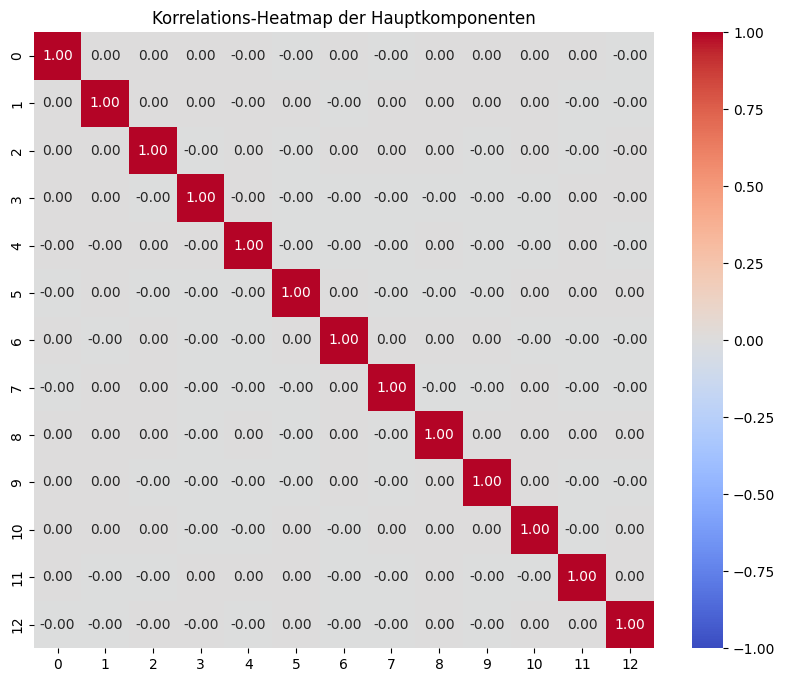

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_A = pd.DataFrame(A).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_A, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelations-Heatmap der Hauptkomponenten')
plt.show()

**Interpretation des Ergebnisses:**
Wie in der Heatmap zu sehen sind die Diagonalelemente alle 1 (logisch, da jede Variable perfekt mit sich selbst korreliert ist) und alle anderen Elemente sind 0. Dies deutet darauf hin, dass die Hauptkomponenten unkorreliert sind und somit eine Reduktion der Dimensionalität ohne Informationsverlust möglich ist.

d) Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten mit den ursprünglichen Variablen. Interpretieren Sie Ihr Ergebnis.

In [ ]:
boston_data = boston_normalized.copy()
PCs = pd.DataFrame(A[:,:3], columns=['PC1', 'PC2', 'PC3'])
combined = pd.concat([boston_data, PCs], axis=1)
corr_pc_orig = combined.corr().loc[PCs.columns, boston_data.columns]

plt.figure(figsize=(10,6))
sns.heatmap(corr_pc_orig, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelations-Heatmap zwischen Hauptkomponenten und Originalvariablen')
plt.show()

e. Stellen Sie die ersten beiden der neuen Variablen als Scatterplot dar (am besten in Pandas-Dataframe importieren). Plotten Sie dabei alle Datenpunkte mit einem Hauspreis oberhalb des Medians aller Hauspreise in einer anderen Farbe als die Datenpunkte unterhalb. Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?